In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [7]:
#read in all the words and store the word as the list
words = open('Names(1).txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [9]:
#creating the dataset
block_size = 3 #context length: how many characters do we take to predict the next one
X=[]
Y=[]

for w in words[:5]:
    print(w)
    context = [0]*block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->',itos[ix])
        context =context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [10]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [11]:
C = torch.randn(27,2)
C

tensor([[ 0.3584, -0.9612],
        [ 1.2209, -0.8173],
        [ 1.0074,  0.4221],
        [-0.2114, -1.1824],
        [ 0.3204, -0.4848],
        [-0.4377, -0.3447],
        [ 1.7681, -0.1936],
        [-1.9232,  1.7464],
        [-2.6339, -0.0132],
        [-0.0758, -0.2195],
        [-1.0787, -1.5236],
        [-0.4294,  1.3556],
        [ 1.7818,  0.5357],
        [-0.2706, -0.2122],
        [ 0.5894, -0.8780],
        [-0.8719, -2.2597],
        [-0.1749,  0.5056],
        [ 0.1625,  0.4605],
        [ 0.0705,  0.3900],
        [ 0.2307, -1.8185],
        [-1.3543,  1.4056],
        [-0.8915,  0.7327],
        [ 0.5136,  0.6045],
        [-0.0885,  1.0480],
        [-1.4323, -0.1783],
        [-0.7129,  1.5515],
        [ 1.5317,  1.2047]])

In [12]:
HOT = F.one_hot(torch.tensor(5),num_classes = 27).float()

In [13]:
print(HOT)

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [14]:
# for intuition -> this was because only the 5th place of the HOT vector was non zero
# so the result was simply the 5th row of the vector C
HOT @ C

tensor([-0.4377, -0.3447])

In [15]:
# or just use simple indexing
C[5]

tensor([-0.4377, -0.3447])

In [16]:
# the input X will be mapped into the C 
# and for every one of the 32,3 integers there is a 2 dimensional mapping in C
emd = C[X] 
print(emd.shape)
emd

torch.Size([32, 3, 2])


tensor([[[ 0.3584, -0.9612],
         [ 0.3584, -0.9612],
         [ 0.3584, -0.9612]],

        [[ 0.3584, -0.9612],
         [ 0.3584, -0.9612],
         [-0.4377, -0.3447]],

        [[ 0.3584, -0.9612],
         [-0.4377, -0.3447],
         [-0.2706, -0.2122]],

        [[-0.4377, -0.3447],
         [-0.2706, -0.2122],
         [-0.2706, -0.2122]],

        [[-0.2706, -0.2122],
         [-0.2706, -0.2122],
         [ 1.2209, -0.8173]],

        [[ 0.3584, -0.9612],
         [ 0.3584, -0.9612],
         [ 0.3584, -0.9612]],

        [[ 0.3584, -0.9612],
         [ 0.3584, -0.9612],
         [-0.8719, -2.2597]],

        [[ 0.3584, -0.9612],
         [-0.8719, -2.2597],
         [ 1.7818,  0.5357]],

        [[-0.8719, -2.2597],
         [ 1.7818,  0.5357],
         [-0.0758, -0.2195]],

        [[ 1.7818,  0.5357],
         [-0.0758, -0.2195],
         [ 0.5136,  0.6045]],

        [[-0.0758, -0.2195],
         [ 0.5136,  0.6045],
         [-0.0758, -0.2195]],

        [[ 0.5136,  0

In [17]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [18]:
# torch.cat() concatenates two tensors and it can be done along two dimensions 
# if it is done using dim 0 -> along rows and using dim1 -> columns
torch.cat([emd[:,0,:], emd[:,1,:], emd[:,2,:]], 1)

tensor([[ 0.3584, -0.9612,  0.3584, -0.9612,  0.3584, -0.9612],
        [ 0.3584, -0.9612,  0.3584, -0.9612, -0.4377, -0.3447],
        [ 0.3584, -0.9612, -0.4377, -0.3447, -0.2706, -0.2122],
        [-0.4377, -0.3447, -0.2706, -0.2122, -0.2706, -0.2122],
        [-0.2706, -0.2122, -0.2706, -0.2122,  1.2209, -0.8173],
        [ 0.3584, -0.9612,  0.3584, -0.9612,  0.3584, -0.9612],
        [ 0.3584, -0.9612,  0.3584, -0.9612, -0.8719, -2.2597],
        [ 0.3584, -0.9612, -0.8719, -2.2597,  1.7818,  0.5357],
        [-0.8719, -2.2597,  1.7818,  0.5357, -0.0758, -0.2195],
        [ 1.7818,  0.5357, -0.0758, -0.2195,  0.5136,  0.6045],
        [-0.0758, -0.2195,  0.5136,  0.6045, -0.0758, -0.2195],
        [ 0.5136,  0.6045, -0.0758, -0.2195,  1.2209, -0.8173],
        [ 0.3584, -0.9612,  0.3584, -0.9612,  0.3584, -0.9612],
        [ 0.3584, -0.9612,  0.3584, -0.9612,  1.2209, -0.8173],
        [ 0.3584, -0.9612,  1.2209, -0.8173,  0.5136,  0.6045],
        [ 1.2209, -0.8173,  0.5136,  0.6

In [19]:
# but the above block's code is not generalised what if the 
# instead of .cat on the previous code ([emd[:,0,:], emd[:,1,:], emd[:,2,:]]), use .unbind which will remove one dimension 
# note -> but both this and the code in the previous block is inefficient 
torch.cat(torch.unbind(emd,1),1)

tensor([[ 0.3584, -0.9612,  0.3584, -0.9612,  0.3584, -0.9612],
        [ 0.3584, -0.9612,  0.3584, -0.9612, -0.4377, -0.3447],
        [ 0.3584, -0.9612, -0.4377, -0.3447, -0.2706, -0.2122],
        [-0.4377, -0.3447, -0.2706, -0.2122, -0.2706, -0.2122],
        [-0.2706, -0.2122, -0.2706, -0.2122,  1.2209, -0.8173],
        [ 0.3584, -0.9612,  0.3584, -0.9612,  0.3584, -0.9612],
        [ 0.3584, -0.9612,  0.3584, -0.9612, -0.8719, -2.2597],
        [ 0.3584, -0.9612, -0.8719, -2.2597,  1.7818,  0.5357],
        [-0.8719, -2.2597,  1.7818,  0.5357, -0.0758, -0.2195],
        [ 1.7818,  0.5357, -0.0758, -0.2195,  0.5136,  0.6045],
        [-0.0758, -0.2195,  0.5136,  0.6045, -0.0758, -0.2195],
        [ 0.5136,  0.6045, -0.0758, -0.2195,  1.2209, -0.8173],
        [ 0.3584, -0.9612,  0.3584, -0.9612,  0.3584, -0.9612],
        [ 0.3584, -0.9612,  0.3584, -0.9612,  1.2209, -0.8173],
        [ 0.3584, -0.9612,  1.2209, -0.8173,  0.5136,  0.6045],
        [ 1.2209, -0.8173,  0.5136,  0.6

In [20]:
# a.view can be used to manipulate the tensor if the elements of a remain same
# a.storage() tells about how every tensor is stored in the computer

#the efficient way is to just use .view when doing the forward pass
#there is -1 because pytorch will determine itself what should be in here
h = torch.tanh(emd.view(-1,6) @ W1 + b1)

In [21]:
h

tensor([[-0.9099, -0.9977,  0.3958,  ..., -0.9666,  0.7865,  0.8413],
        [-0.2010, -0.9479,  0.7763,  ..., -0.7766, -0.6994,  0.9927],
        [-0.9514, -0.8625,  0.7719,  ..., -0.1810, -0.3225,  0.7781],
        ...,
        [-0.2450,  1.0000,  0.9989,  ...,  0.2693, -0.9981,  0.9944],
        [-0.9982,  0.6001, -0.8255,  ...,  0.7591,  0.9761, -0.9695],
        [-0.9665,  0.9998, -0.8678,  ..., -0.9996,  0.9732, -0.9989]])

In [22]:
h.shape

torch.Size([32, 100])

In [44]:
# forward pass 
logits = h @ W2 + b2


In [28]:
#final layer's parameter
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [42]:
 # implement softmax
counts =  logits.exp()
prob = counts/counts.sum(dim=1,keepdims=True)


In [43]:
# each row of Y there will be prob assigned in prob to the correct character
# so pluck out that prob , y is the index of the target characters
# the torch.arange() helps to index the rows and then the pluck out the prob corresponding to Y
loss = -prob[torch.arange(32),Y].log().mean()
loss


tensor(17.0709)

In [45]:
# ------------ now made respectable :) ---------------

In [114]:
g = torch.Generator().manual_seed(2147483647) 
# these are all the parameters that were used
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [54]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [66]:
emd = C[X] #(32,3,2)
h = torch.tanh(emd.view(-1,6) @ W1 + b1) #32,100
logits = h @ W2 + b2#32,27
counts = logits.exp()
prob = counts/counts.sum(dim = 1, keepdim=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7697)

In [87]:
# using F.cross_entropy() has more benifits than manualy applying the cross entropy function
# one of the advantages is that it is numerically well behaved
loss = F.cross_entropy(logits,Y)
loss

tensor(17.7697)

In [115]:
for p in parameters:
    p.requires_grad=True

In [98]:
#always remeber to set the gradient to 0 before applying the backward pass

In [119]:
X.shape

torch.Size([228146, 3])

In [117]:
for _ in range(1000):
        #forward pass
    emd = C[X] #(32,3,2)
    h = torch.tanh(emd.view(-1,6) @ W1 + b1) #32,100
    logits = h @ W2 + b2#32,27
    
    
    # setting gradients = 0
    for p in parameters:
        p.grad = None
    #backward pass
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

0.25564074516296387


In [ ]:
# for whole dataset and determining the learning rate--------> 

In [188]:
g = torch.Generator().manual_seed(2147483647) 
# these are all the parameters that were used
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [189]:
#note -> the dataset before was of only 5 examples but here it is for whole dataset
#and i left the above one for visualising how the building of the dataset works
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [190]:
for p in parameters:
    p.requires_grad=True

In [191]:
# trying to get a perfect learning rate
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [200]:
lossi = []
lri = []

for i in range(10000):
    #so the now the X has 228146 values so converting the whole dataset into batches will work
    #construcing mini batch
    ix = torch.randint(0,X.shape[0],(32,))
    #forward pass
    emd = C[X[ix]] #(32,3,2)
    h = torch.tanh(emd.view(-1,6) @ W1 + b1) #32,100
    logits = h @ W2 + b2#32,27
    loss = F.cross_entropy(logits,Y[ix])
    
    
    
    # setting gradients = 0
    for p in parameters:
        p.grad = None

    #backward pass
    loss.backward()
    #update
    # determined that 0.1 is good learning rate
    # now doing learning rate decaty turn 0.1 into 0.01
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    #track status
    #lri.append(lre[i])
    #lossi.append(loss.item())

print(loss.item())


2.105865716934204


In [201]:
# loss for the whole dataset
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3901, grad_fn=<NllLossBackward0>)

In [ ]:
# spliting the dataset into 3 parts -> training set(80%), validation/dev set(10%), test set (10%)----->

In [207]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])



torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [208]:

for i in range(10000):

    ix = torch.randint(0,Xtr.shape[0],(32,))
    #forward pass
    emd = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emd.view(-1,6) @ W1 + b1) #32,100
    logits = h @ W2 + b2#32,27
    loss = F.cross_entropy(logits,Ytr[ix])
    
    
    
    # setting gradients = 0
    for p in parameters:
        p.grad = None

    #backward pass
    loss.backward()
    
    #update
    
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
   


In [210]:
# loss for the whole dataset
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.4274, grad_fn=<NllLossBackward0>)

In [211]:
# loss for the dev dataset
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4347, grad_fn=<NllLossBackward0>)

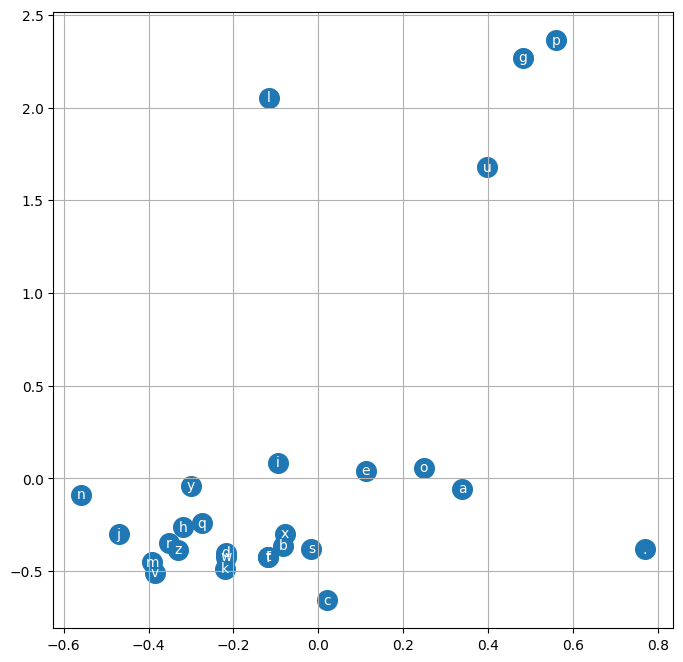

In [212]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [213]:
# the model turned out to be overfitted because the model is too small
# so the next step is increasing the model size(hidden layer and the C)
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [216]:
sum(p.nelement() for p in parameters) # number of parameters in total

TypeError: 'Tensor' object is not callable

In [217]:
for p in parameters:
  p.requires_grad = True

In [218]:
lri = []
lossi = []
stepi = []

In [219]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

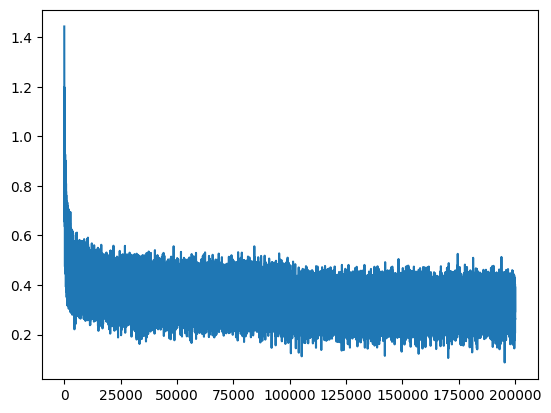

In [220]:
plt.plot(stepi, lossi)

In [221]:
# training loss 
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1152, grad_fn=<NllLossBackward0>)

In [222]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1617, grad_fn=<NllLossBackward0>)

In [223]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1639, grad_fn=<NllLossBackward0>)

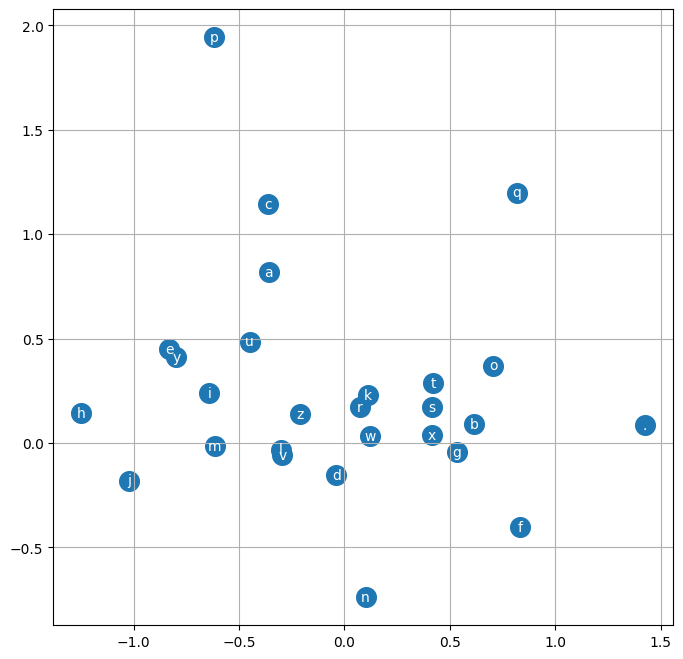

In [224]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

#### so this was kind  of a playground where i took notes and and repeated the code many times for every modification

#### so i will attach another file by karpathy himself in which there is only the required code and **SAMPLING** too